# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

Description
Context
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

Objective
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business.

## Data Description
The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary:

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Price paid per order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the * food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off
information

### Let us start by importing the required libraries

In [1]:
# import libraries and other commands for convenience
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import seaborn as sns # for statistical plots
%matplotlib inline
#
# Print output for every line of code
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity="all"
import warnings
warnings.filterwarnings("ignore")

**Connect to Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Python Course/Exploratory'

Mounted at /content/drive


### Understanding the structure of the data

In [3]:
food_data=pd.read_csv(f"{path}/foodhub_order.csv")
food_df=food_data.copy()

In [4]:
# Write your code here to view the first 5 rows
food_df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
food_df.shape

(1898, 9)

#### Observations: This Data has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are around 1898 rows as we had seen before .No null or missing values in dataset.There are
* one float i.e cost_of_the_order
* Four int type (order_id,customer_id,food_preparation_time,delivery_time)
* Remaining four are of object type (rating,day_of_the_week,cuisine_type,restaurant_name)
It's strange to see rating as object type as rating can be integer further anlysis on this column is required


In [7]:
food_df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observation: No Null value in columns



In [ ]:
food_df['rating'].apply(type).value_counts()

rating
<class 'str'>    1898
Name: count, dtype: int64

#### Observation It seems all fields for rating is string

In [ ]:
food_df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

#### Observation We see that in there are onlt 4 unique values out of which all can be integer apart from one i.e **Not given**.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

>



In [ ]:
food_df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no missing value in the data.As we had seen there no null values .Only Rating has some values as **Not given**.Which user had choosen not to rate


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
food_df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:We can ignore statistical summary of order_id and customer_id as both of these are just unique identifier and does not have much values w.r.t statistical summary.Below we remove those two fields to focous on remianing atrributes

In [ ]:
food_df[['cost_of_the_order','food_preparation_time','delivery_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


#### Observations:
1. cost_of_the_order :Minimum order value is 4.47 where as max order value is 35.41
2. food_preparation_time:Minimum food preparation time is 20.00 where as max is  35
3. delivery_time: Minimum time taken to deliver the foox after pickup is 15 mins where as maximum is 33 mins.
> **Even It's observed that mean and median very near to each other in these column so the distrubution is nearly symmetrical**



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
food_df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observation : There are total 736 orders where rating is not present so user might had choosen not give any rating.


In [ ]:
food_df_temp=food_df[food_df['rating']!='Not given'].copy()
food_df_temp['rating'] = food_df_temp['rating'].astype(int)
food_df_temp.drop(['order_id','customer_id'],axis=1).rating.describe().T

count    1162.000000
mean        4.344234
std         0.741478
min         3.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

#### Observation: It's observe that the average rating coming around 4.3 by excluding the ones where the rating not given

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Utility Function**

In [8]:
def findToporBottom(df,col_name,n,isTop):
  if(isTop):
    top_values = df[col_name].value_counts().nlargest(n).index
    top_df = df[df[col_name].isin(top_values)]
    return top_df
  else:
    bottom_values = df[col_name].value_counts().nsmallest(n).index
    bottom_df = df[df[col_name].isin(bottom_values)]
    return bottom_df

In [14]:
def anotate_chart(plot,ax):
  for p in ax.patches:
      plt.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')



In [18]:
def drawcountPlot(df,x,n,xlabel,ylabel,title,isTop,hue=None):
  top_resturant_df=findToporBottom(df,x,n,isTop)
  plt.figure(figsize=(12, 6))
  ax=sns.countplot(data=top_resturant_df, x=x, hue=hue,color='red')
  plt.xticks(rotation=45)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  anotate_chart(plt,ax)
  return plt

# **Customer_id Analysis**

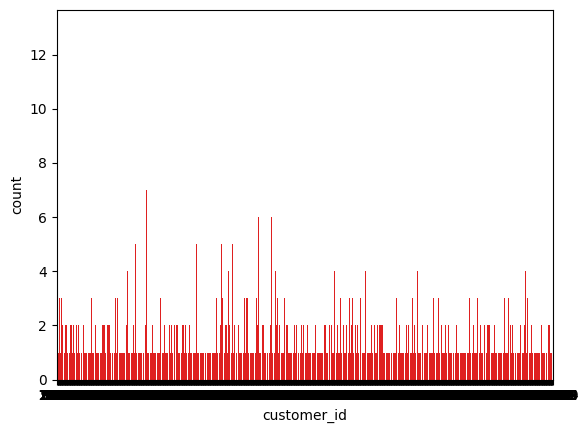

In [42]:
sns.countplot(data=food_df,x='customer_id',color='red')
plt.show()

#### Observation: Trying to Analyze frenquency of each customers but the count plot seems to cluttred with so many values.

In [15]:
print(f"Unique customer count {food_df.customer_id.nunique()}")

Unique customer count 1200


#### Observation:We see the plot is cluttered as we have 1200 unique customers

**So we Now we want to limit to top 10 customer and bottom 10 customer no of orders**

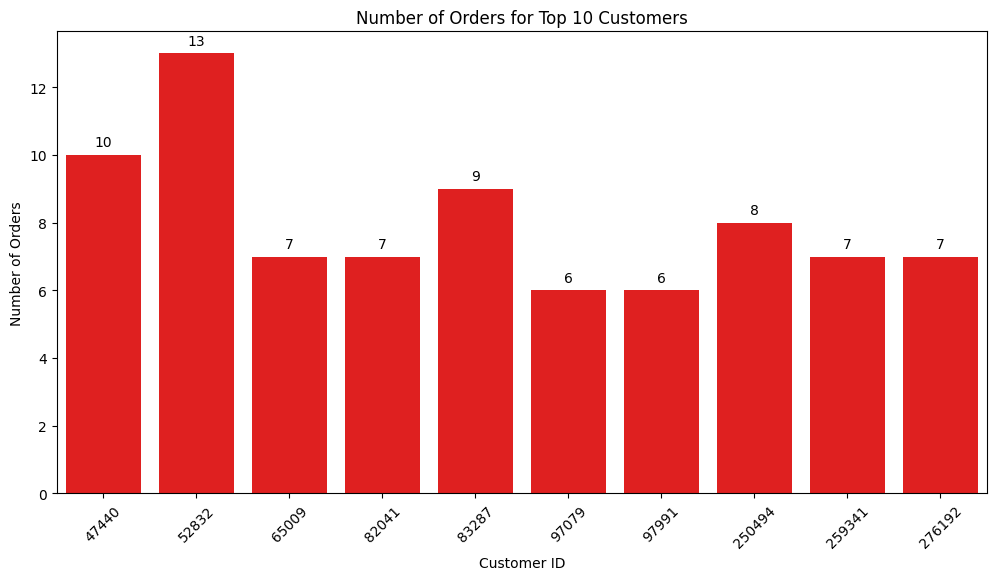

In [19]:
top_n=10
drawcountPlot(df=food_df,x='customer_id',n=top_n,xlabel='Customer ID',ylabel='Number of Orders',title=f'Number of Orders for Top {top_n} Customers',isTop=True)
plt.show()

#### Observation:Highest no of order for a customer is around 13.Top 10 customers orders are in the range of 6-13



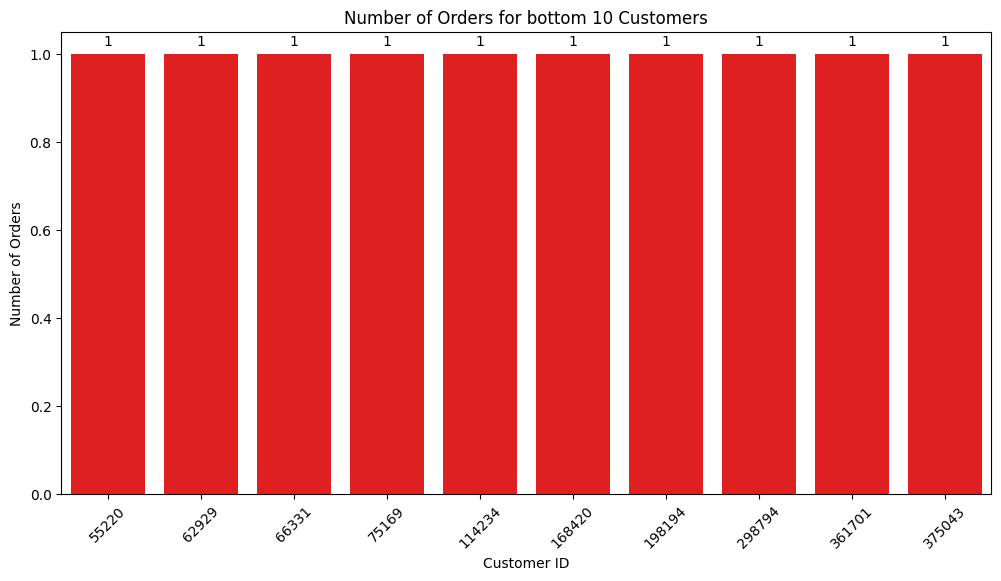

In [20]:
bottom_n=10
drawcountPlot(df=food_df,x='customer_id',n=top_n,xlabel='Customer ID',ylabel='Number of Orders',title=f'Number of Orders for bottom {bottom_n} Customers',isTop=False)
plt.show()

#### Observations:As observed min no of order for some of the customer is around 1.Need to check what's the percentage of customer has only ordered once

In [ ]:
food_df['customer_id'].value_counts().reset_index()

,customer_id,count
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,259341,7
...,...,...
1195,385426,1
1196,254913,1
1197,289597,1
1198,74412,1


In [ ]:
def calculatePercentage(df):
  customer_count_df = df['customer_id'].value_counts().reset_index()
  frequency_count= customer_count_df['count'].value_counts()

  finalres=frequency_count['Percentage']=frequency_count/customer_count_df.shape[0]*100
  return finalres

In [ ]:
calculatePercentage(food_df)

count
1     65.333333
2     22.250000
3      6.916667
4      2.750000
5      1.583333
6      0.500000
7      0.333333
13     0.083333
10     0.083333
9      0.083333
8      0.083333
Name: count, dtype: float64

#### Observations : Here it's observed that only one customer has ordered 13 times from foodhub where as around 65% of customer only ordered once from FoodHub.There is a study needed to check why they never comeback to the FoodHub after their first order

In [21]:
customer_count_df = food_df['customer_id'].value_counts().reset_index()
customer_id_once_order=customer_count_df[customer_count_df['count']==1]['customer_id'].reset_index()
filtered_food_df = food_df.merge(customer_id_once_order[['customer_id']], on='customer_id', how='inner')
print(f"Users review who purchased only once :{filtered_food_df.rating.value_counts()}")

Users review who purchased only once :rating
Not given    297
5            246
4            166
3             75
Name: count, dtype: int64


#### Observation: There is no clear indication that why they did not come back ordering from food hub as only 297 out of them are not given feedback so we can ruled out that they did not like the service and someof them even rated 5 and 4 star

# restaurant_name Orders Analysis

In [22]:
food_df['restaurant_name'].nunique()

178

### As there are 178 unique resturant so we take only top 10 and like to see the plot

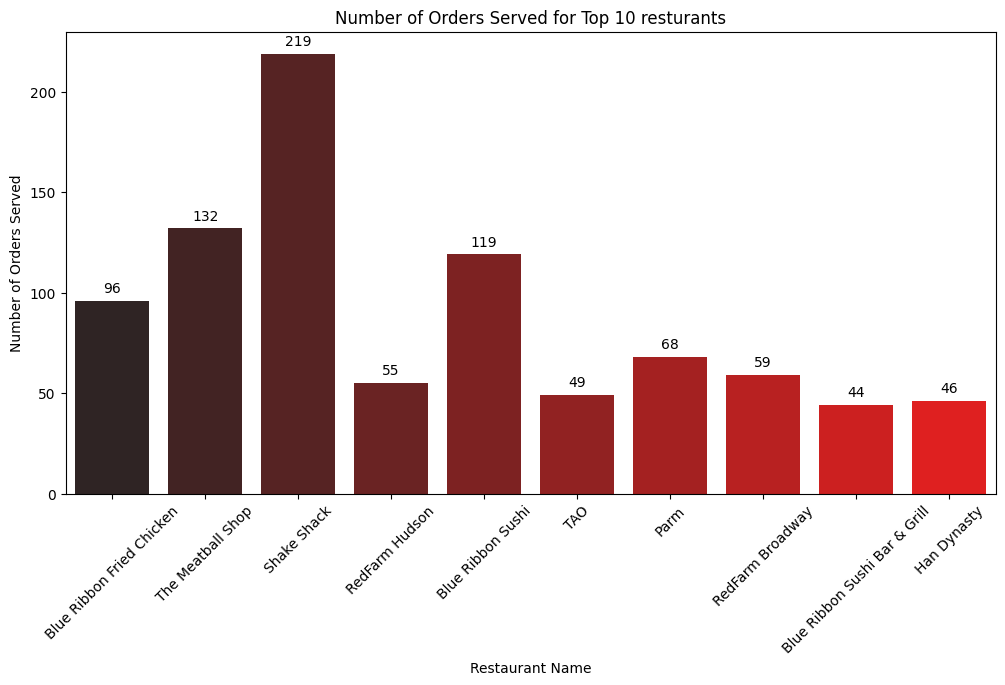

In [23]:
topn=10
drawcountPlot(df=food_df,x='restaurant_name',n=topn,xlabel='Restaurant Name',ylabel='Number of Orders Served',title=f'Number of Orders Served for Top {topn} resturants',isTop=True,hue='restaurant_name')
plt.show()

#### Observation: It is observed from chart that highest served resturant is **Shake Shack** with 219 followed by **The Meatball Shop** with 132

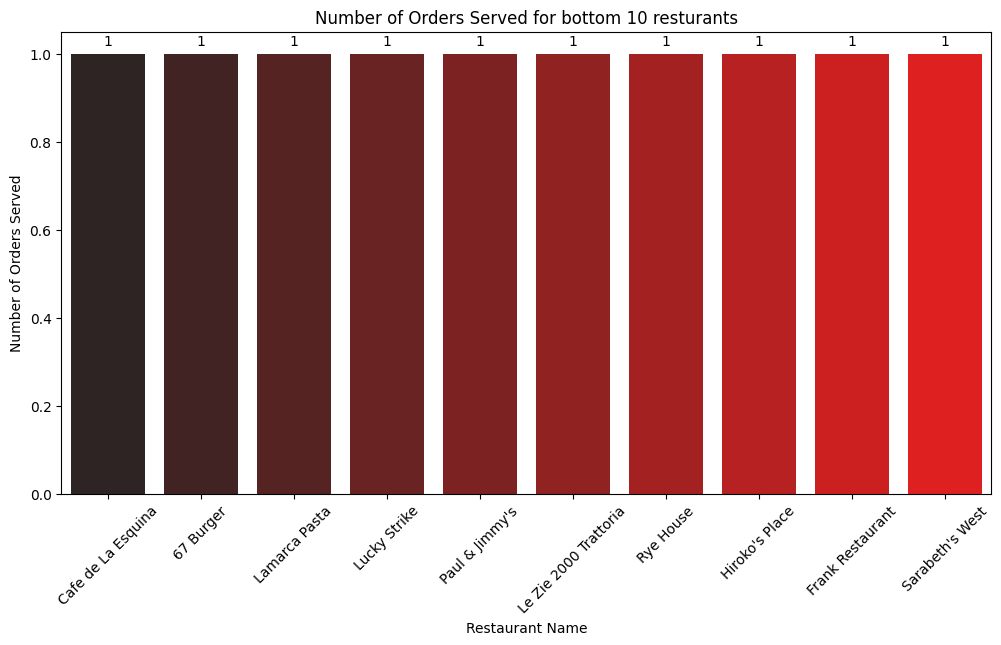

In [24]:
botn=10
drawcountPlot(df=food_df,x='restaurant_name',n=topn,xlabel='Restaurant Name',ylabel='Number of Orders Served',title=f'Number of Orders Served for bottom {botn} resturants',isTop=False,hue='restaurant_name')
plt.show()

#### Observation: It's seen that many of the resturant served only once.In next section we will try to find out how many of these kind of resturants are there

In [ ]:
restaurant_counts=food_df['restaurant_name'].value_counts()
restaurant_counts_one_order = restaurant_counts[restaurant_counts == 1]
restaurant_counts_one_order.count()

50

#### Observation:Around 50 restuants are there who only served once.

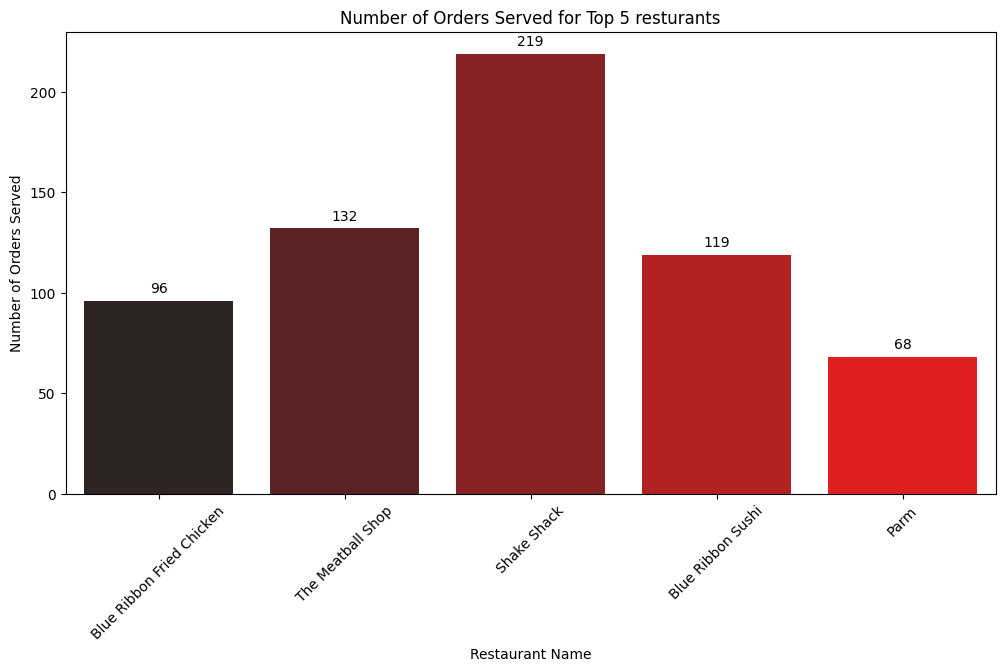

In [25]:
topn=5
drawcountPlot(df=food_df,x='restaurant_name',n=topn,xlabel='Restaurant Name',ylabel='Number of Orders Served',title=f'Number of Orders Served for Top {topn} resturants',isTop=True,hue='restaurant_name')
plt.show()

#### Observation:The Top 5 resturants in terms of order received are **['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi','Blue Ribbon Fried Chicken', 'Parm']**
> Shake Shack Served around 219 orders.Top 5 resturants served order in between 68-219 orders






# cuisine_type Analysis

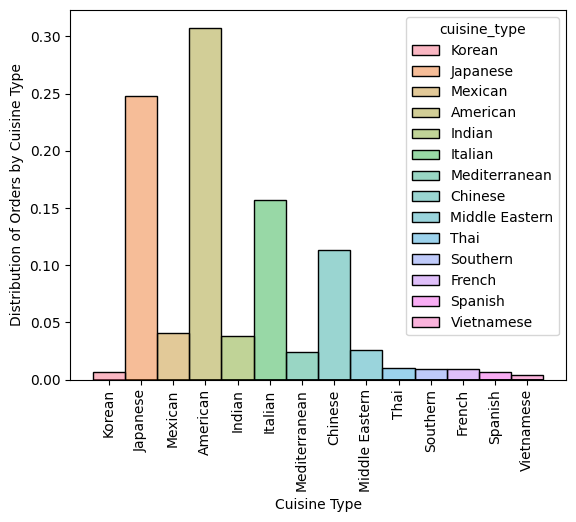

In [43]:
sns.histplot(data=food_df,x='cuisine_type',stat='density',hue='cuisine_type')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Distribution of Orders by Cuisine Type')
plt.show()

#### Observations:American is one cuisine which has high density of order followed by japanses and Italian

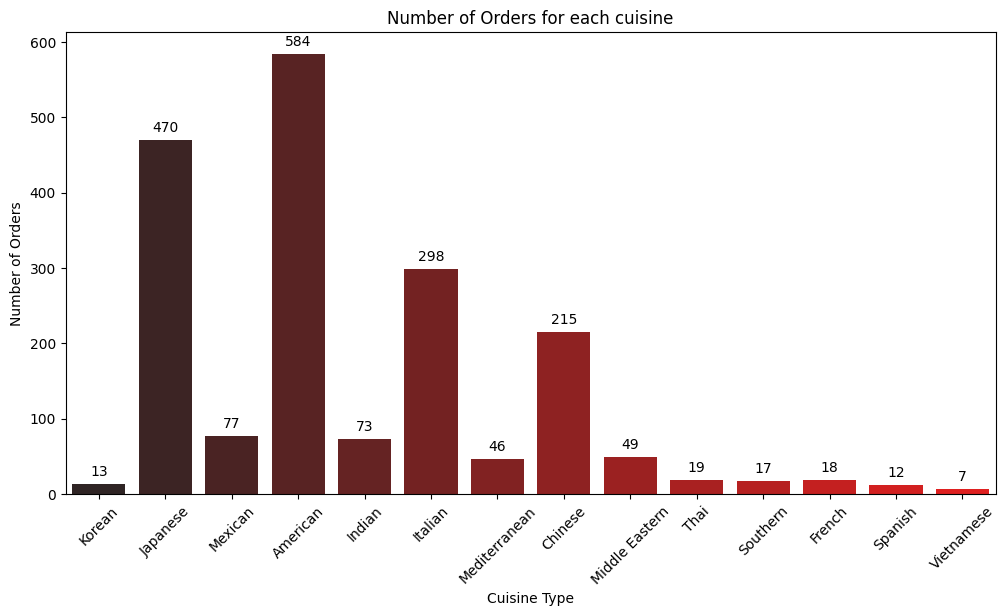

In [46]:
n=food_df.cuisine_type.nunique()
drawcountPlot(df=food_df,x='cuisine_type',n=n,xlabel='Cuisine Type',ylabel='Number of Orders',title=f'Number of Orders for each cuisine',isTop=True,hue='cuisine_type')
plt.show()

 #### Observations: American cuisine is highly famous among customers followed by Japanese
1.   American:584
2.   Japanese:470
3.   Italian:298
4.   Chinese:215

In [47]:
food_df.day_of_the_week.unique()

array(['Weekend', 'Weekday'], dtype=object)

In [48]:
weekday_df=food_df[food_df['day_of_the_week']=='Weekday']
Weekend_df=food_df[food_df['day_of_the_week']=='Weekend']

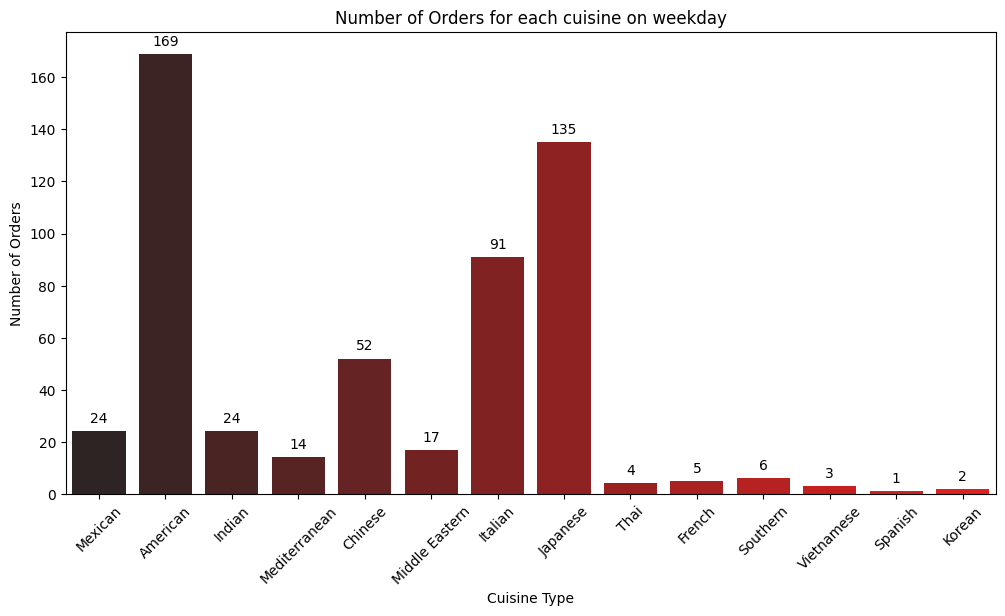

In [50]:
n=food_df.cuisine_type.nunique()
drawcountPlot(df=weekday_df,x='cuisine_type',n=n,xlabel='Cuisine Type',ylabel='Number of Orders',title=f'Number of Orders for each cuisine on weekday',isTop=True,hue='cuisine_type')
plt.show()

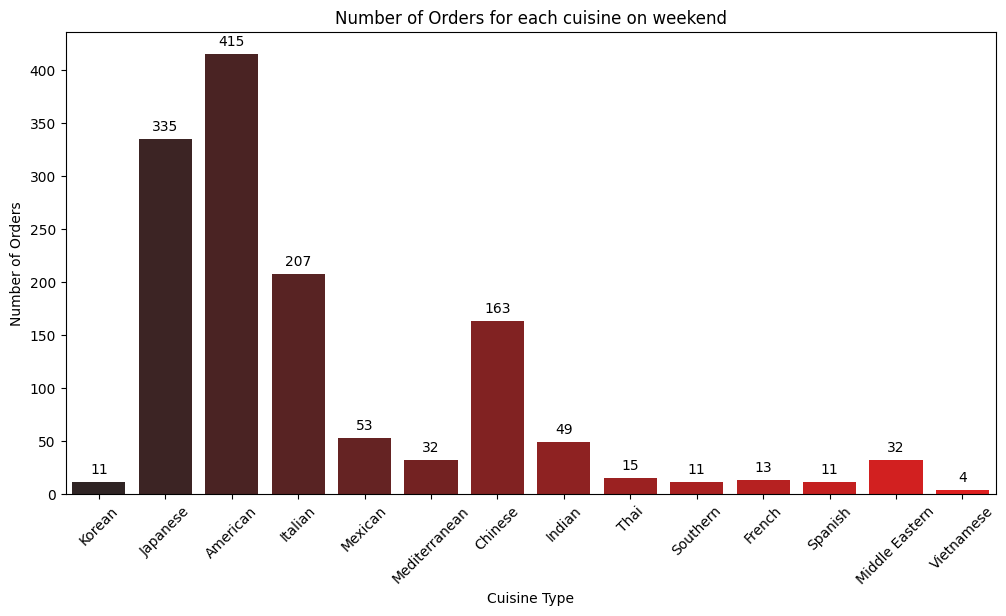

In [52]:
n=food_df.cuisine_type.nunique()
drawcountPlot(df=Weekend_df,x='cuisine_type',n=n,xlabel='Cuisine Type',ylabel='Number of Orders',title=f'Number of Orders for each cuisine on weekend',isTop=True,hue='cuisine_type')
plt.show()

#### Observations:On weekdays and weekends we see American cuisine is having highest order followed by Japanese and Italian.So our previous inference that more users prefer ordering American cuisine is still holding true irrespective of days.

#### Observations:From above count Plot and operations on dataframe it's clear that American cuisine is preffered on weekends

# cost_of_the_order Analysis

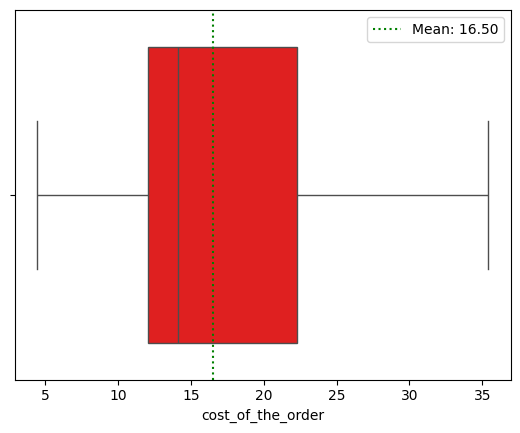

In [63]:
mean_value=food_df.cost_of_the_order.mean()
sns.boxplot(data=food_df,x='cost_of_the_order',color='red');
plt.axvline(mean_value, color='green', linestyle=':', label=f'Mean: {mean_value:.2f}')
plt.legend()
plt.show()

#### Observation:
1. Box plot is having a long whisker towards right.Median is also on the left side of the box at around 14 approx .Which makes this distributions right skewed.
2. We see most of the order is in between 11 and 14 approx .So most of the people prefer items which are price between 11-14.
3. Even we see from the Box plot that average value of the order is around 16.50

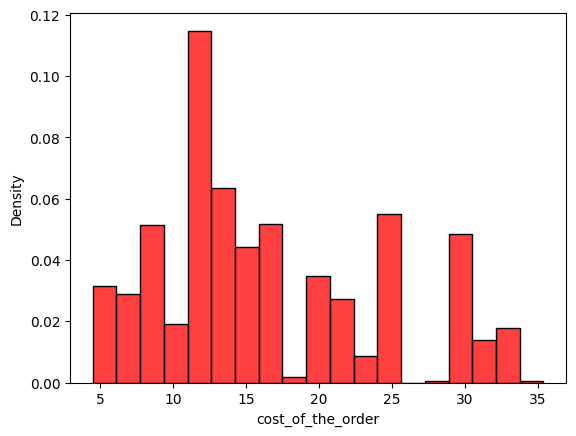

In [59]:
sns.histplot(data=food_df,x='cost_of_the_order',stat='density',color='red');

#### Observations: From histogram it's seen that cost_of_order is having skewed distributions towards right as the histogram is having long right tail.


# day_of_the_week Analysis

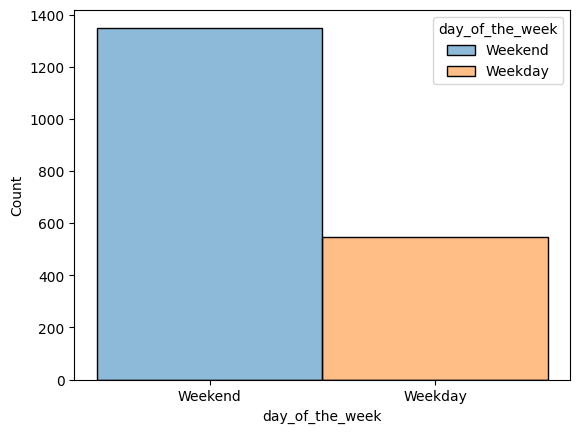

In [84]:
sns.histplot(data=food_df,x='day_of_the_week',color='red',hue='day_of_the_week',stat='count');


In [86]:

print(f"Total Order {food_df.day_of_the_week.count()} {food_df.day_of_the_week.value_counts()}")

Total Order 1898 day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64


#### Observation: The majority of orders are on weekend

*   Weekend: 1351 out of 1898
*   Weekday: 547 out of 1898




# Ratings Analyis

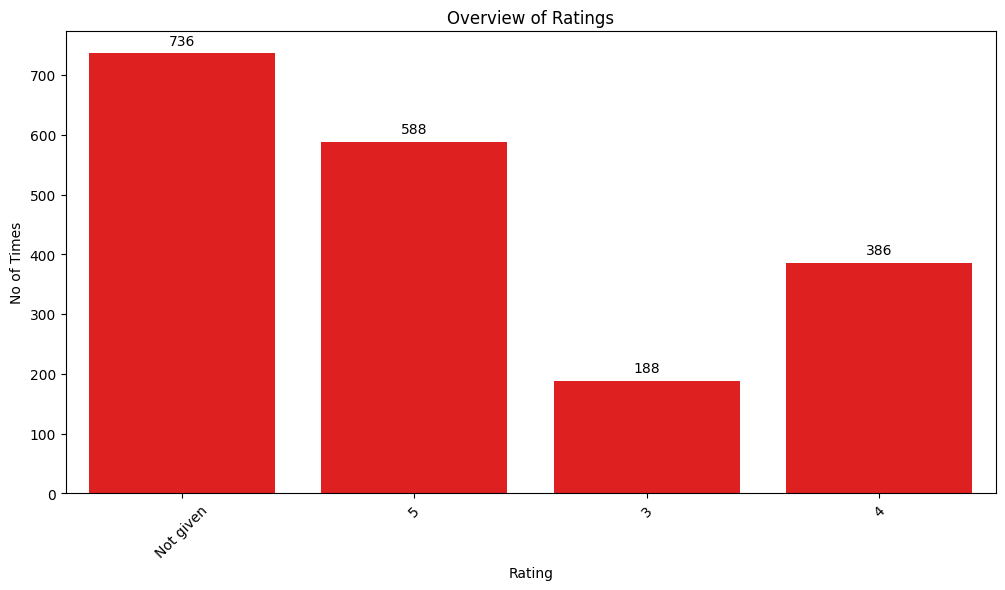

In [91]:
no_of_rating=food_df.rating.nunique()
drawcountPlot(df=food_df,x='rating',n=no_of_rating,xlabel='Rating',ylabel='No of Times',title=f'Overview of Ratings',isTop=True);


In [93]:
rating_percentages = food_df['rating'].value_counts(normalize=True) * 100
rating_percentages

rating
Not given    38.777661
5            30.979979
4            20.337197
3             9.905163
Name: proportion, dtype: float64

#### Observation: Plot shows that many customers(Around 38%) did not give any rating and most of the remaning customers rated 5 star(Around 30%)


1.  Not given->38.777661%
2.  5->30.979979%
3.  4->20.337197%
4.  3->9.905163%



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here

#### Observation:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here

#### Observation:

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here

#### Observation:

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# Write the code here

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  